<a href="https://colab.research.google.com/github/Xantosh/ML_Tenorflow/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the IMDB dataset



In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
len(train_data)

25000

In [3]:
test_labels[1]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
# Decoding reveiws back to text

In [6]:
word_index = imdb.get_word_index()
# word_index
reverse_word_index = dict((value, key) for (key, value) in word_index.items())
#reverse_word_index

# if less than 0 or equal to 0 then dictionary returns "?"

decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
# Preparing the data
# Encoding the integer sequence using multi-hot encoding

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000): # creates matrix of row of 25000 and each having 10k words
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences): # loop for creating multi hot encoding
    for j in sequence:
      results[i, j] = 1
  return results


In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# vectorizing the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [10]:
#Building the model
# Model definition

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [11]:
#compiling the model
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [12]:
# setting asisde a validation test
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
# training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5127 - accuracy: 0.7861 - val_loss: 0.3982 - val_accuracy: 0.8527
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3072 - accuracy: 0.9013 - val_loss: 0.3286 - val_accuracy: 0.8717
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2208 - accuracy: 0.9294 - val_loss: 0.2805 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1771 - accuracy: 0.9423 - val_loss: 0.2812 - val_accuracy: 0.8844
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1415 - accuracy: 0.9547 - val_loss: 0.2802 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1171 - accuracy: 0.9643 - val_loss: 0.3053 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0957 - accuracy: 0.9724 - val_loss: 0.3821 - val_accuracy: 0.8662
Epoch 8/20
30

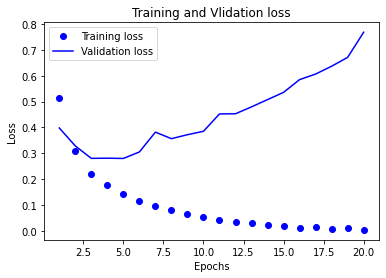

In [16]:
# plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and Vlidation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

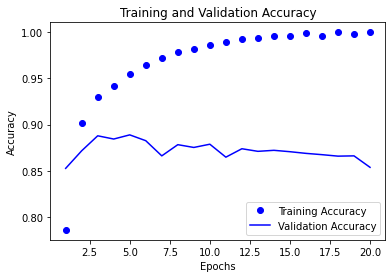

In [19]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
# Retraining the model from scrath because of overfitting

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 26ms/step - loss: 0.4505 - accuracy: 0.8196
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2577 - accuracy: 0.9106
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1986 - accuracy: 0.9302
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3315 - accuracy: 0.8680


In [22]:
results    # [trainng_loss, accuracy]

[0.33147570490837097, 0.8679599761962891]

In [23]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.13234195],
       [0.99994427],
       [0.60358226],
       ...,
       [0.07346331],
       [0.05050628],
       [0.5229523 ]], dtype=float32)